In [20]:
# Install the Lahman package by un-commenting out the line below.
#install.packages('Lahman', repos='http://cran.us.r-project.org')
library(Lahman)

Exciting stuff here, now we are going to create a new function so that we can get player info.

Also, MLB calculates the age of a player for the season played based on how old they are on June 30th of that season.

In [46]:
# Get Player Info function
getPlayerInfo <- function(firstName, lastName){
    # Get the Player Data from the Master data frame.
    playerLine <- subset(Master, nameFirst==firstName & nameLast==lastName)
    name.code <- as.character(playerLine$playerID)  # no reason to seprate the name like this, but whatever.
    birthYear <- playerLine$birthYear
    birthMonth <- playerLine$birthMonth
    birthDay <- playerLine$birthDay
    byear <- ifelse(birthMonth <= 6, birthYear, birthYear + 1)
    list(name.code=name.code, birthYear=byear) 
}

In [27]:
# Get the Player Info by calling our method from above
ruth.info <- getPlayerInfo("Babe","Ruth")
aaron.info <- getPlayerInfo("Hank","Aaron")
bonds.info <- getPlayerInfo("Barry","Bonds")
arod.info <- getPlayerInfo("Alex","Rodriguez")
str(ruth.info)



List of 2
 $ name.code: chr "ruthba01"
 $ birthYear: int 1895


In [45]:
# Now get the Batting data for each player into a Data Frame and create the Age feature.
ruth.data <- subset(Batting, playerID == ruth.info$name.code)
ruth.data$Age <- ruth.data$yearID - ruth.info$birthYear

aaron.data <- subset(Batting, playerID == aaron.info$name.code)
aaron.data$Age <- aaron.data$yearID - aaron.info$birthYear

bonds.data <- subset(Batting, playerID == bonds.info$name.code)
bonds.data$Age <- bonds.data$yearID - bonds.info$birthYear

arod.data <- subset(Batting, playerID == arod.info$name.code)
arod.data$Age <- arod.data$yearID - arod.info$birthYear

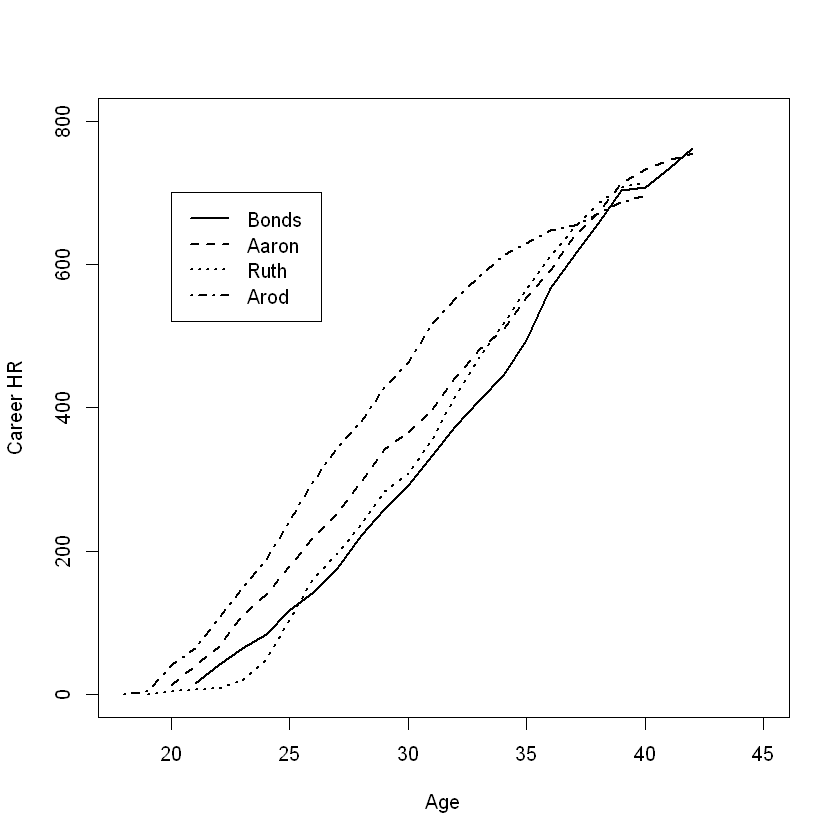

In [44]:
# Plot out Babe Ruth's data and some general attributes of the graph.
# type is the letter l, not the number one.  Stands for Line 
# lty is line type.  lwd is line weight
with(ruth.data, plot(Age, cumsum(HR), type="l", lty=3, lwd=2, xlab="Age", ylab="Career HR", xlim=c(18, 45), ylim=c(0, 800)))

# Now add the rest of the players.
with(aaron.data, lines(Age, cumsum(HR), lty=2, lwd=2))
with(bonds.data, lines(Age, cumsum(HR), lty=1, lwd=2))
with(arod.data, lines(Age, cumsum(HR), lty=4, lwd=2))

# set up the legend so we know who is who
legend(20, 700, legend=c("Bonds","Aaron","Ruth", "Arod"), lty=1:4, lwd=2)


Challenge:  Re-Write this using a loop.